In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [137]:
df = pd.read_csv('/Users/natalagrunskaa/Desktop/AirlineReviews7.csv')
df.columns = df.columns.to_series().apply(lambda x: x.strip())
df.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0000,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0000,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0000,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0000,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0000,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Aircraft             36423 non-null   object 
 1   AirlineName          129455 non-null  object 
 2   CabinType            126437 non-null  object 
 3   DateFlown            90993 non-null   object 
 4   DatePub              129455 non-null  object 
 5   EntertainmentRating  129455 non-null  int64  
 6   FoodRating           129455 non-null  int64  
 7   GroundServiceRating  129455 non-null  int64  
 8   OriginCountry        127777 non-null  object 
 9   OverallScore         125124 non-null  float64
 10  Recommended          129455 non-null  object 
 11  Review               128631 non-null  object 
 12  Route                90825 non-null   object 
 13  SeatComfortRating    129455 non-null  int64  
 14  ServiceRating        129455 non-null  int64  
 15  Slug             

In [139]:
print(f"There are {df.isna().sum().sum()} missing values.")
print(f"There are {df.duplicated().sum()} duplicate rows.")

There are 288235 missing values.
There are 0 duplicate rows.


In [140]:
verified_trips = df['TripVerified'].unique()
print(verified_trips)

['Trip Verified' nan 'Not Verified' 'Trip Verified,Trip Verified'
 'NotVerified' 'Not Verified,Not Verified'
 'Chicago to Colorado Springs. Not Verified']


In [141]:
df['TripVerified'] = df['TripVerified'].replace('NotVerified', 'Not Verified')
df['TripVerified'] = df['TripVerified'].replace('Not Verified,Not Verified', 'Not Verified')
df['TripVerified'] = df['TripVerified'].replace('Trip Verified,Trip Verified', 'Trip Verified')
df['TripVerified'] = df['TripVerified'].replace('Chicago to Colorado Springs. Not Verified', 'Not Verified')
df['TripVerified'] = df['TripVerified'].replace(['Trip Verified', 'Not Verified'],[1,0])

In [142]:
recommend_trips = df['Recommended'].unique()
print(recommend_trips)

['yes' 'no']


In [143]:
df['Recommended']=df['Recommended'].replace(["yes","no"],[1,0])

In [144]:
df['MonthYearPublished'] = pd.to_datetime(df['DatePub'],format='mixed').dt.to_period('M')
df['MonthYearPublished'] = df['MonthYearPublished'].dt.year.astype(str) + df['MonthYearPublished'].dt.month.astype(str).str.zfill(2)
df['MonthYearPublished'] = pd.to_numeric(df['MonthYearPublished'], errors='coerce')
print(df['MonthYearPublished'])

0         201911
1         201906
2         201906
3         201012
4         201011
           ...  
129450    201007
129451    201006
129452    201006
129453    201006
129454    201006
Name: MonthYearPublished, Length: 129455, dtype: int64


In [145]:
print('from ', df['MonthYearPublished'].min(), ' to ',
      df['MonthYearPublished'].max())

from  200201  to  202305


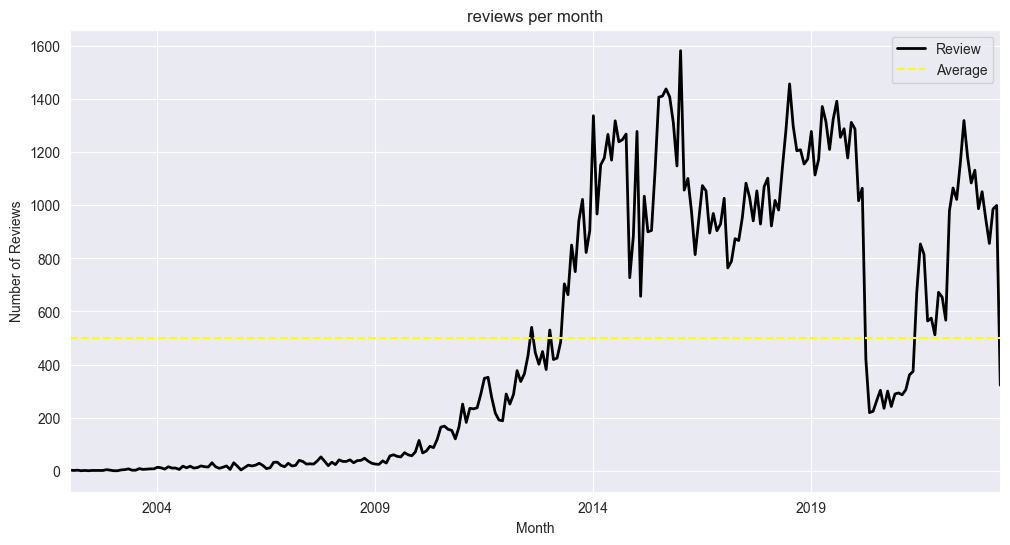

In [146]:
df['MonthYearPublished'] = pd.to_datetime(df['MonthYearPublished'], format='%Y%m')
monthly_reviews = df.resample('M', on='MonthYearPublished').count()['Review']
average_reviews = monthly_reviews.mean()
plt.figure(figsize=(12, 6))
monthly_reviews.plot(linewidth=2,color ='black')
plt.axhline(y=average_reviews, color='yellow',linestyle='--', label='Average')
plt.title('reviews per month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()

In [147]:
example_df = df[['Aircraft', 'Slug','AirlineName','DateFlown','DatePub','OriginCountry']]
example_df.head()

,Aircraft,Slug,AirlineName,DateFlown,DatePub,OriginCountry
0,NaN,ab-aviation,AB Aviation,November 2019,11th November 2019,Netherlands
1,E120,ab-aviation,AB Aviation,June 2019,25th June 2019,UnitedKingdom
2,Embraer E120,ab-aviation,AB Aviation,June 2019,25th June 2019,UnitedKingdom
3,NaN,aerocaribbean,Aerocaribbean,NaN,31st December 2010,Denmark
4,NaN,aerocaribbean,Aerocaribbean,NaN,25th November 2010,UnitedKingdom


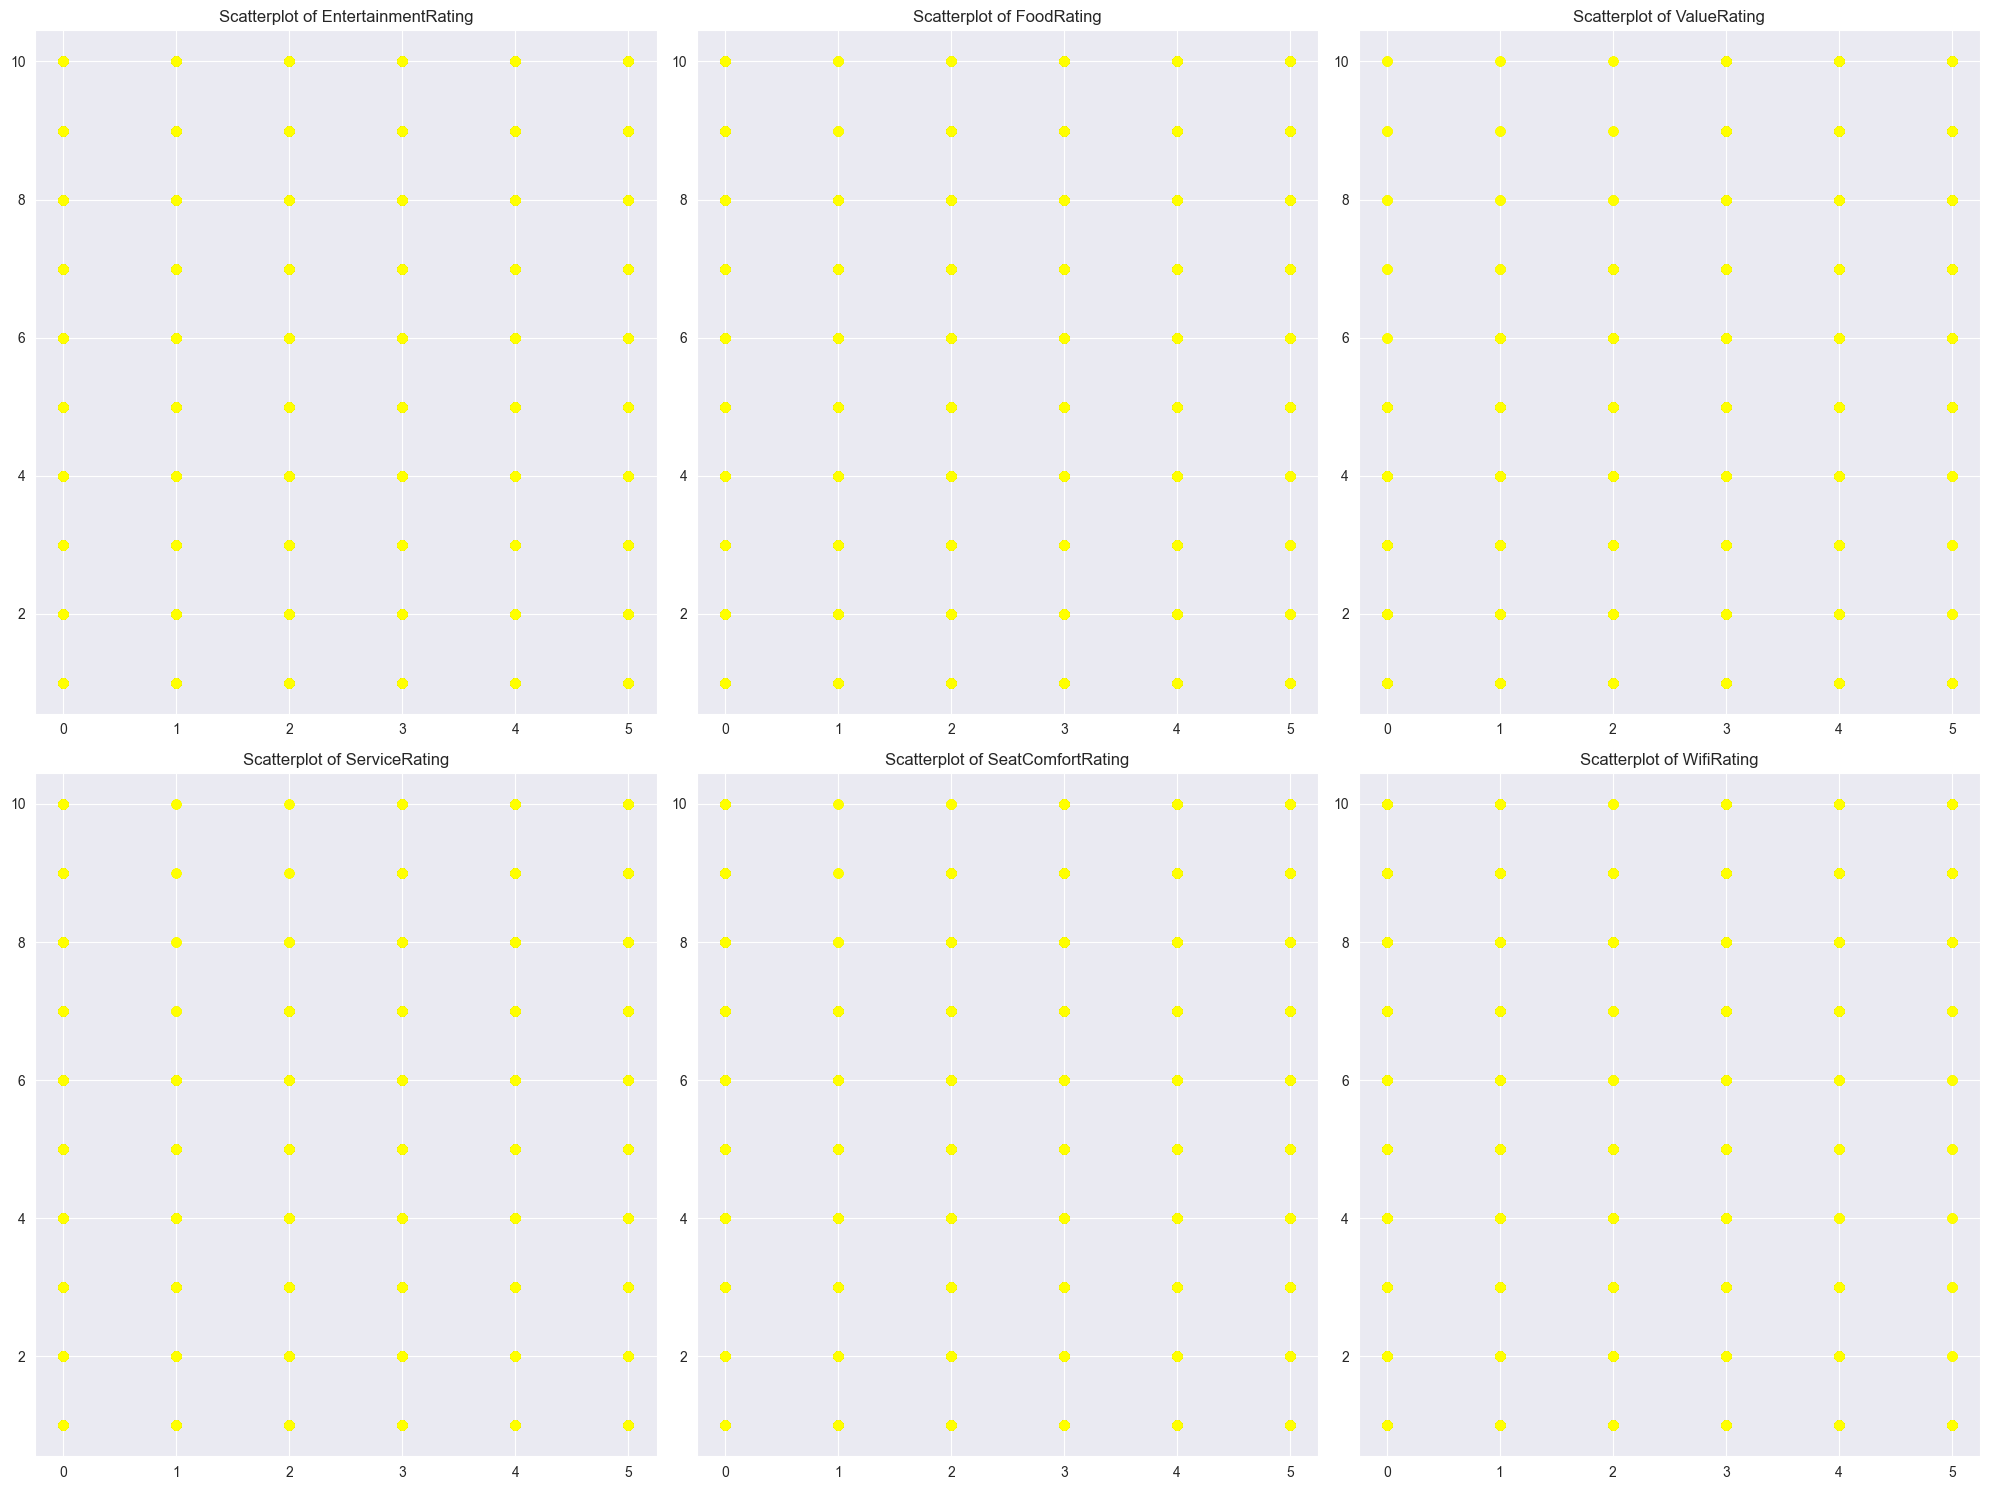

In [148]:
ratings_columns=['EntertainmentRating','FoodRating','ValueRating','ServiceRating','SeatComfortRating','WifiRating']
num_rows = 2
num_cols = 3
total_plots = num_rows * num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
for i, column in enumerate(ratings_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.scatter(x = df[column], y = df['OverallScore'], color='yellow')
    ax.set_title(f'Scatterplot of {column}')
if i + 1 < total_plots:
    for j in range(i + 1, total_plots):
        row = j // num_cols
        col = j % num_cols
        fig.delaxes(axes[row, col])
plt.tight_layout()
plt.show()


plt.show()

In [149]:
from sklearn import preprocessing

df=df.dropna(axis=0, how='any', subset=None, inplace=False) 
pd.options.display.float_format ='{:,.4f}'.format
df =df.drop(columns=['Aircraft','Slug','OriginCountry','Route','TravelType','Title','unique_id','DateFlown','DatePub'])
df.sample(10)


    
    

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,TripVerified,ValueRating,WifiRating,MonthYearPublished
2910,Aer Lingus,Economy Class,2,1,3,1.0000,0,We flew from Philadelphia to Dublin and on to ...,1,1,1.0000,1,1,2018-05-01
73664,Malaysia Airlines,Business Class,1,1,4,1.0000,0,Kuala Lumpur to Auckland. The cabin staff were...,2,1,1.0000,1,3,2019-01-01
51245,Gulf Air,Economy Class,4,4,3,8.0000,1,Bahrain to London Heathrow. Boarding the plane...,5,5,1.0000,5,0,2018-08-01
111233,TAP Portugal,Economy Class,0,2,1,1.0000,0,Lisbon to Funchal. I saw a senior female fligh...,1,1,1.0000,1,0,2018-06-01
84853,Saudi Arabian Airlines,Economy Class,3,3,4,8.0000,1,Individual experiences and preferences can var...,5,4,1.0000,4,3,2023-05-01
114733,Virgin Australia,Economy Class,0,3,4,7.0000,1,I enjoyed the flight. Check in was easy and th...,3,4,1.0000,3,0,2023-03-01
9029,Air Europa,Economy Class,2,1,1,1.0000,0,Amsterdam to Madrid. Very bad website! Even th...,1,1,1.0000,1,1,2019-11-01
15240,AirAsia,Economy Class,0,0,5,10.0000,1,"I flew with AirAsia twice this month, 1st from...",5,5,1.0000,5,0,2023-03-01
89089,Qatar Airways,Business Class,4,4,4,10.0000,1,Denpasar to Paris via Doha. Overall a very goo...,5,5,1.0000,5,4,2018-05-01
93319,Scoot,Economy Class,0,0,3,6.0000,1,Singapore to Ipoh. Having read preceding revie...,3,3,1.0000,3,0,2018-09-01


/Users/natalagrunskaa/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/natalagrunskaa/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/natalagrunskaa/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


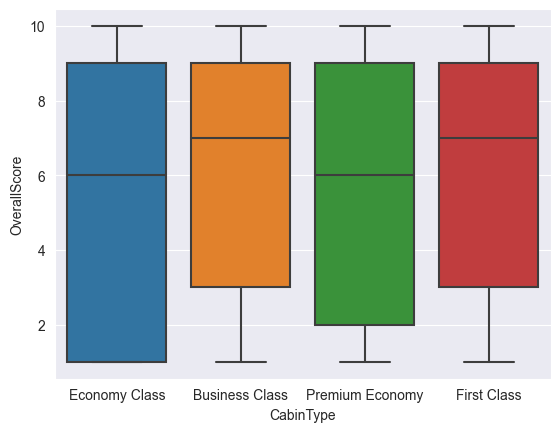

In [150]:
sns.boxplot(data=df,x='CabinType', y='OverallScore')
plt.show()

In [151]:
df['TripVerified'].value_counts(dropna='False')

TripVerified
1.0000    15934
0.0000     2685
Name: count, dtype: int64

In [152]:
ratings_columns = ['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating', 'OverallScore']
df[ratings_columns].describe()

,EntertainmentRating,FoodRating,GroundServiceRating,SeatComfortRating,ServiceRating,ValueRating,WifiRating,OverallScore
count,"18,619.0000","18,619.0000","18,619.0000","18,619.0000","18,619.0000","18,619.0000","18,619.0000","18,619.0000"
mean,1.9350,2.5431,3.0668,3.1110,3.3989,3.1500,0.8634,5.5017
std,1.8800,1.7786,1.6015,1.4710,1.5762,1.5780,1.5174,3.4119
min,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000
25%,0.0000,1.0000,1.0000,2.0000,2.0000,1.0000,0.0000,2.0000
50%,1.0000,3.0000,3.0000,3.0000,4.0000,3.0000,0.0000,6.0000
75%,4.0000,4.0000,5.0000,4.0000,5.0000,5.0000,1.0000,9.0000
max,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,10.0000


/Users/natalagrunskaa/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/natalagrunskaa/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/natalagrunskaa/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/natalagrunskaa/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1

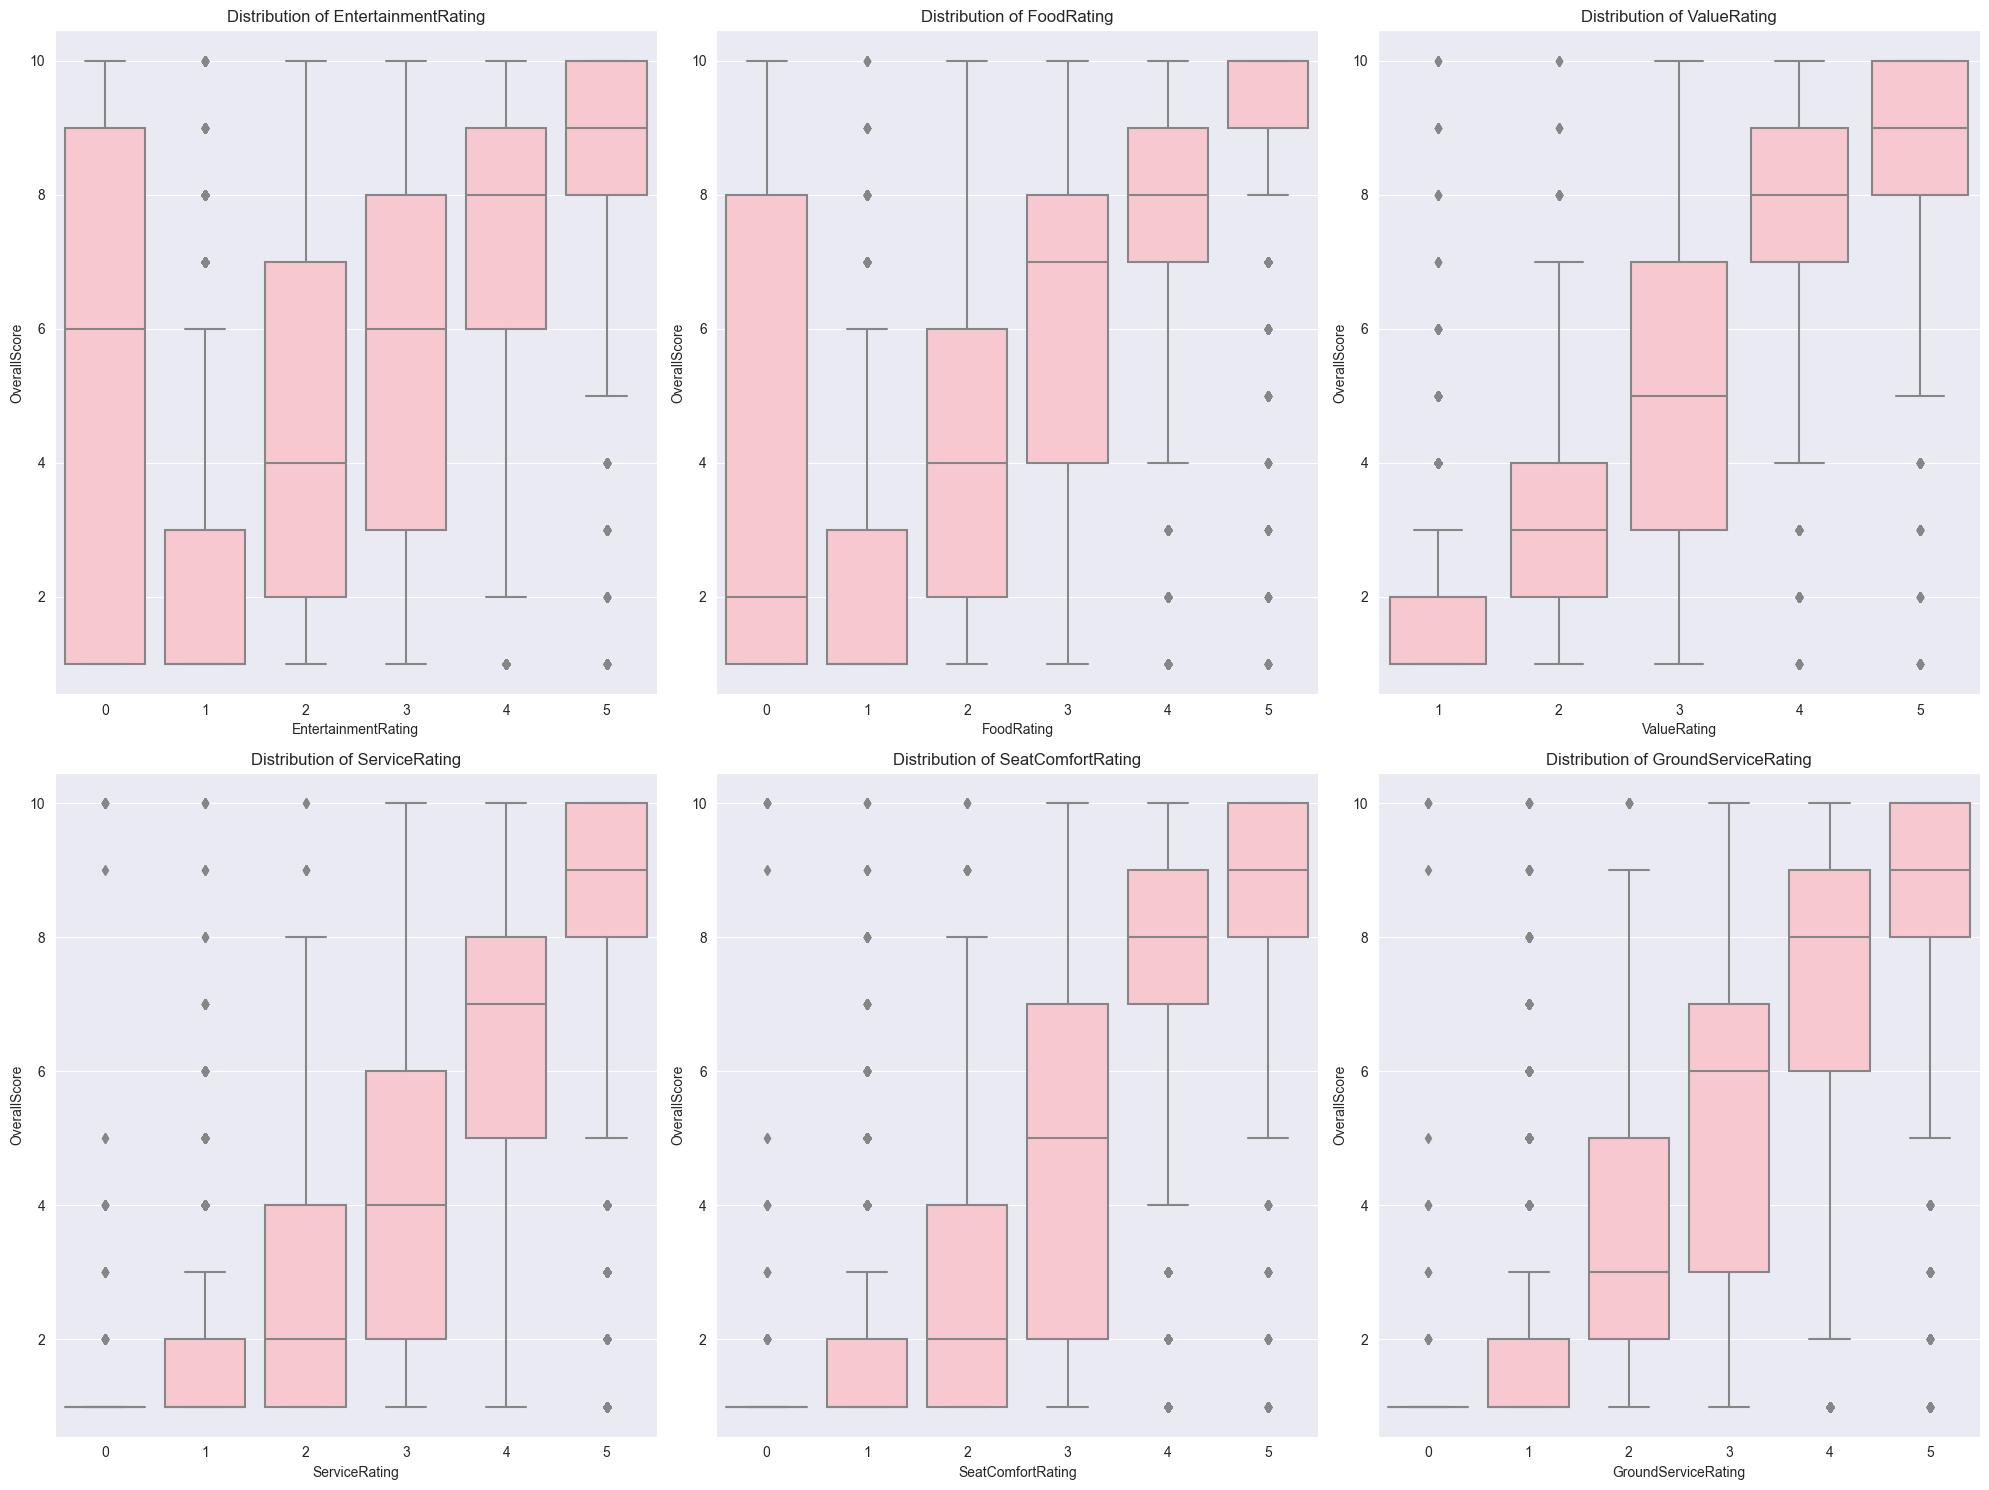

In [153]:
ratings_columns=['EntertainmentRating','FoodRating','ValueRating','ServiceRating','SeatComfortRating','GroundServiceRating']
num_rows = 2
num_cols = 3
total_plots = num_rows * num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
for i, column in enumerate(ratings_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.boxplot(df, ax=ax,x=column,y='OverallScore'
                ,color='pink')
    ax.set_title(f'Distribution of {column}')
if i + 1 < total_plots:
    for j in range(i + 1, total_plots):
        row = j // num_cols
        col = j % num_cols
        fig.delaxes(axes[row, col])
plt.tight_layout()
plt.show()

/Users/natalagrunskaa/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/natalagrunskaa/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/natalagrunskaa/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/natalagrunskaa/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/seaborn/_ol

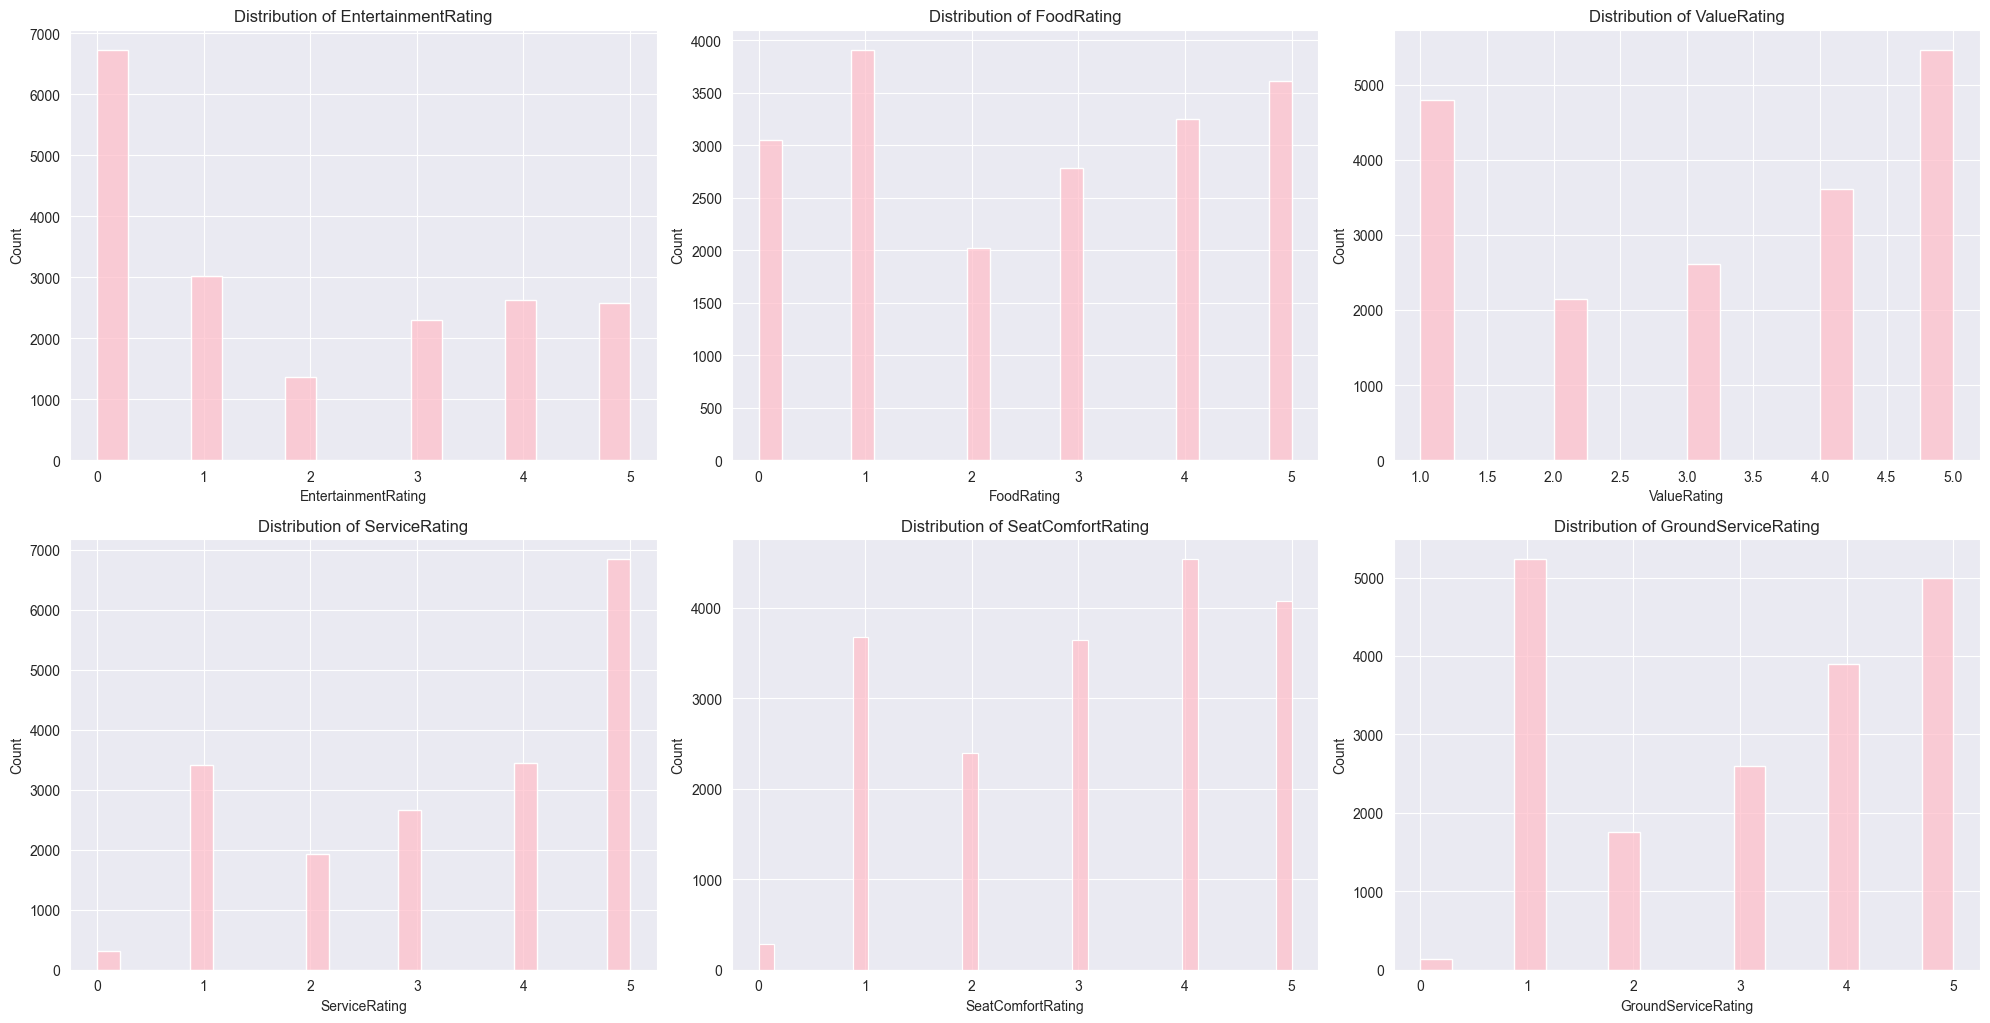

In [154]:
num_rows = 3
num_cols = 3
total_plots = num_rows * num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
for i, column in enumerate(ratings_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(df[column], ax=ax, color='pink')
    ax.set_title(f'Distribution of {column}')
if i + 1 < total_plots:
    for j in range(i + 1, total_plots):
        row = j // num_cols
        col = j % num_cols
        fig.delaxes(axes[row, col])
plt.tight_layout()
plt.show()

/Users/natalagrunskaa/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/natalagrunskaa/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


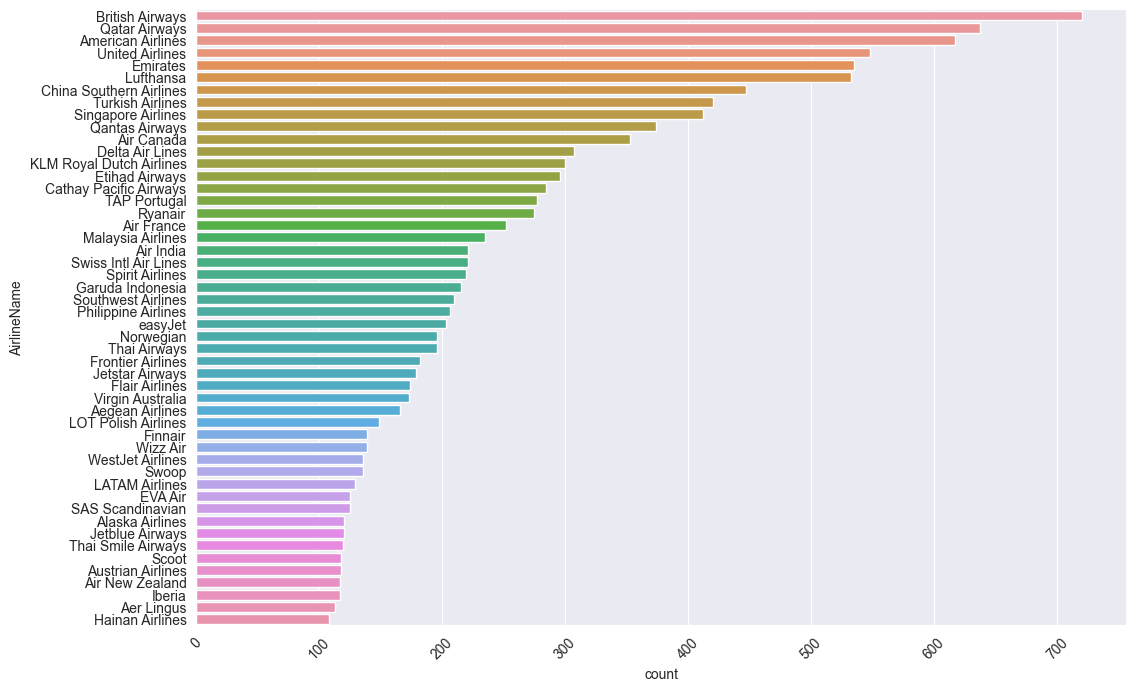

In [155]:
airline_counts = df['AirlineName'].value_counts()
top_50_airlines = airline_counts[:50].index
plt.figure(figsize=(12, 8))
sns.countplot(y='AirlineName', data=df, order=top_50_airlines)
plt.xticks(rotation=45)
plt.show()


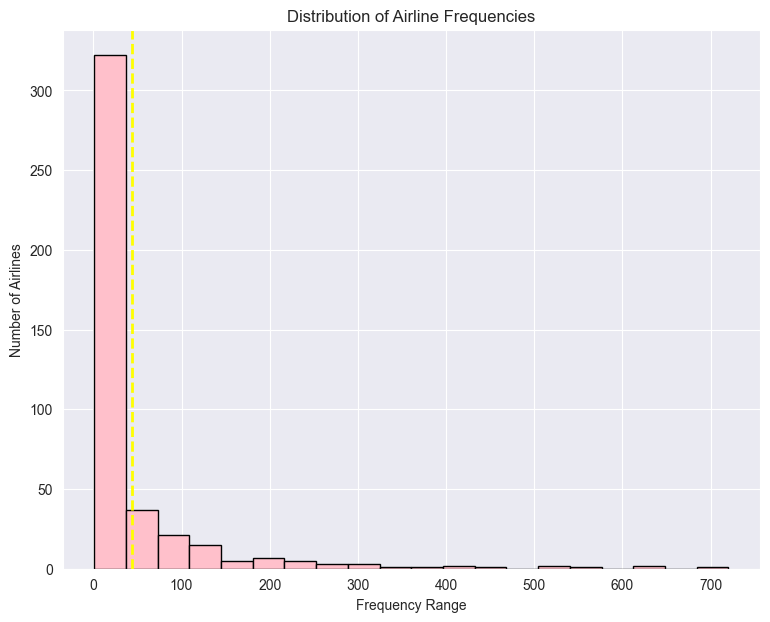

In [156]:
import numpy as np

# Compute the value counts of each airline
airline_counts = df['AirlineName'].value_counts()

# Define the number of bins as 20 for the histogram
num_bins = 20

# Create the histogram plot
plt.figure(figsize=(9, 7))
plt.hist(airline_counts, bins=num_bins, color='pink', edgecolor='black')

# Set the labels and title
plt.xlabel('Frequency Range')
plt.ylabel('Number of Airlines')
plt.title('Distribution of Airline Frequencies')

# Add a line for the mean value
mean = np.mean(airline_counts)
plt.axvline(x=mean, color='yellow', linestyle='--', linewidth=2)

# Display the plot
plt.show()

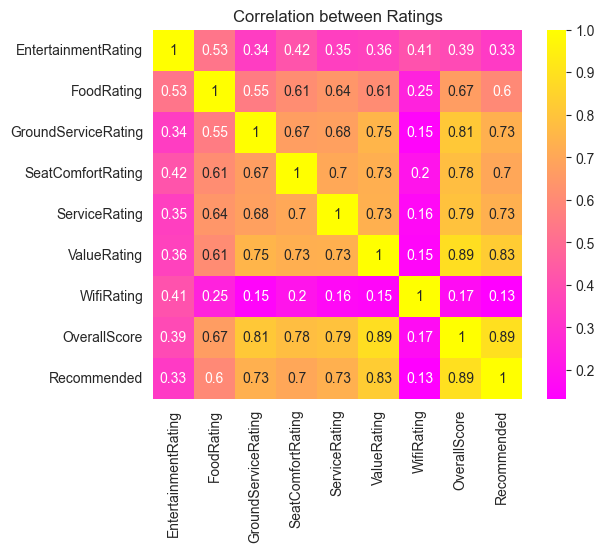

In [157]:
rating_cols = ['EntertainmentRating', 'FoodRating', 'GroundServiceRating',
               'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating', 'OverallScore','Recommended']
corr_matrix = df[rating_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='spring', square=True)
plt.title('Correlation between Ratings')
plt.show()

In [158]:
df['AirCompanyUsage'] = df.groupby('AirlineName')['AirlineName'].transform('count')
df['ReviewLen'] = df['Review'].apply(lambda x: len(str(x).split()))
df['AverageScore'] = df[['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'SeatComfortRating', 'ServiceRating', 'ValueRating']].mean(axis= 1 )

In [159]:
df.sample(20)

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,TripVerified,ValueRating,WifiRating,MonthYearPublished,AirCompanyUsage,ReviewLen,AverageScore
51026,Hainan Airlines,Economy Class,3,3,4,5.0000,1,Was a very pleasant flight though food very po...,2,5,1.0000,4,0,2019-04-01,108,204,3.5000
75714,Lufthansa,Premium Economy,0,0,0,1.0000,0,Bangkok to Luxembourg via Munich. We booked a ...,0,0,1.0000,1,0,2019-05-01,532,444,0.1667
111356,TAP Portugal,Business Class,4,4,1,5.0000,0,"First Leg: Vienna-Miami: Food was really good,...",1,3,1.0000,2,0,2018-01-01,277,48,2.5000
23941,American Airlines,Economy Class,4,0,4,8.0000,1,Flew with American Airlines to San Francisco f...,4,5,1.0000,3,5,2019-04-01,617,143,3.3333
120119,Turkish Airlines,Economy Class,3,5,2,5.0000,0,Istanbul to Geneva. Clearly deteriorating Cust...,2,4,1.0000,2,0,2020-01-01,420,179,3.0000
57432,Frontier Airlines,Economy Class,0,0,1,1.0000,0,Syracuse to Chicago. Frontier is a clown opera...,0,0,1.0000,1,0,2019-05-01,182,207,0.3333
79666,Norwegian,Economy Class,0,2,4,6.0000,1,Malaga to HelsinkiThe ground handling at Malag...,1,3,0.0000,3,0,2020-03-01,196,55,2.1667
108235,Thai Smile Airways,Economy Class,0,4,4,10.0000,1,Excellent airline to fly with. I like all the ...,5,5,1.0000,5,0,2020-10-01,119,38,3.8333
7443,Air Canada,Economy Class,0,0,1,3.0000,0,My flight from New York to Toronto was cancell...,3,3,1.0000,2,0,2018-05-01,353,120,1.5000
61305,JetsuiteX,Business Class,0,5,5,10.0000,1,La Vegas to Burbank. Cheap flight and free dri...,5,5,1.0000,5,0,2018-08-01,1,110,4.1667


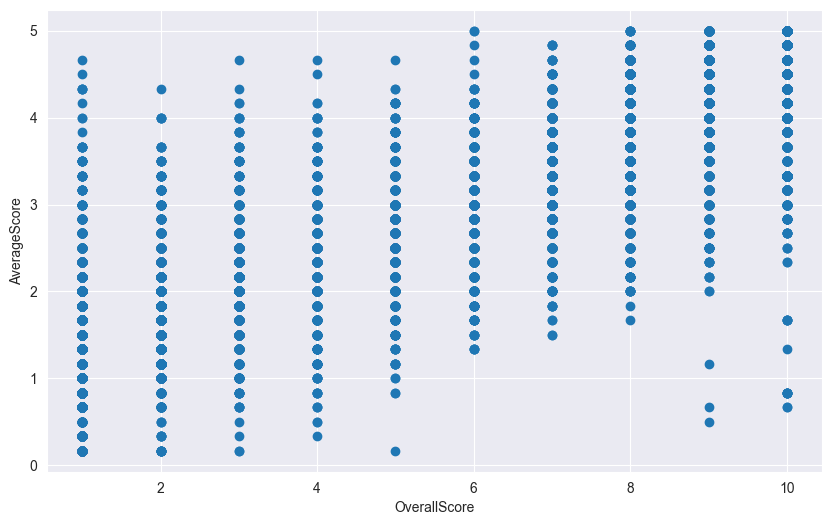

In [160]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['OverallScore'], y = df['AverageScore'])
plt.xlabel("OverallScore")
plt.ylabel("AverageScore")

plt.show()

In [161]:
# to_norm_cols = ['EntertainmentRating', 'FoodRating', 'GroundServiceRating',
#                'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating', 'OverallScore','AverageScore','AirCompanyUsage']
# for col in to_norm_cols:
#     df[col] = preprocessing.normalize([df[col]])[0]
# df.sample(10)

In [162]:
df['AirlineNameCode'] = pd.factorize(df.AirlineName)[0]
df['CabinTypeCode'] = pd.factorize(df.CabinType)[0]
df.sample(10)

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,TripVerified,ValueRating,WifiRating,MonthYearPublished,AirCompanyUsage,ReviewLen,AverageScore,AirlineNameCode,CabinTypeCode
2092,Aegean Airlines,Economy Class,3,5,5,9.0000,1,LGW-ATH-LHR Aegean Airlines. Aegean has kept u...,5,5,1.0000,5,0,2019-03-01,166,78,4.6667,19,0
28302,Avianca,Business Class,1,1,1,1.0000,0,Worst ground and flight experience in years wi...,1,2,0.0000,1,0,2022-08-01,77,213,1.1667,101,1
105813,Swiss Intl Air Lines,Business Class,0,3,3,8.0000,1,I was surprised by the quality of the service ...,3,4,0.0000,4,0,2022-10-01,221,49,2.8333,370,1
41733,Ethiopian Airlines,Economy Class,1,2,1,4.0000,0,"Average to below average. Dirty, dated 767 on ...",1,2,0.0000,3,0,2021-07-01,92,36,1.6667,155,0
60998,Japan Airlines,Economy Class,2,5,5,10.0000,1,Flew with Japan Airlines for first time. There...,5,5,0.0000,5,0,2020-01-01,67,101,4.5000,217,0
59409,Icelandair,Economy Class,4,4,4,8.0000,1,I had a return trip home to Canada for Christm...,5,4,1.0000,4,4,2023-01-01,55,304,4.1667,205,0
71157,Lynx Air,Economy Class,0,4,5,8.0000,1,I flew Calgary/Halifax return with a touchdown...,5,5,1.0000,5,0,2022-08-01,30,63,4.0000,246,0
9081,Air Europa,Economy Class,1,1,1,1.0000,0,Amsterdam to Madrid. I paid the XL seat and pe...,1,1,1.0000,1,0,2019-07-01,70,39,1.0000,37,0
70259,Laudamotion,Economy Class,0,0,1,3.0000,0,Düsseldorf to Málaga. Our flight was operated ...,2,1,1.0000,2,0,2018-08-01,18,41,1.0000,240,0
110830,TAP Portugal,Economy Class,0,0,0,1.0000,0,New York to Rome via Lisbon. Very poor custome...,0,0,0.0000,1,0,2019-04-01,277,49,0.1667,375,0


In [163]:
df = df.drop(columns=['AirlineName','CabinType','Review','MonthYearPublished'])
df.sample(10)


,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,TripVerified,ValueRating,WifiRating,AirCompanyUsage,ReviewLen,AverageScore,AirlineNameCode,CabinTypeCode
41758,3,5,2,7.0000,1,5,4,1.0000,4,3,92,154,3.8333,155,0
83416,4,4,4,6.0000,1,4,4,1.0000,4,4,57,50,4.0000,315,1
34673,0,0,0,10.0000,1,0,0,0.0000,5,0,53,36,0.8333,131,0
28827,5,5,4,10.0000,1,5,5,1.0000,4,0,83,334,4.6667,113,1
44418,4,1,1,1.0000,0,3,1,1.0000,2,2,535,186,2.0000,157,1
124395,0,4,3,8.0000,1,3,5,1.0000,3,0,548,130,3.0000,416,3
28808,0,0,1,2.0000,0,2,3,1.0000,2,0,83,116,1.3333,113,2
36808,0,0,1,2.0000,0,1,1,1.0000,1,0,44,39,0.6667,142,0
74868,0,4,5,8.0000,1,3,5,1.0000,5,0,532,80,3.6667,260,1
109482,3,3,4,7.0000,1,4,4,1.0000,3,0,196,78,3.5000,379,0


In [164]:
df = df.drop(columns=['AverageScore'])
df.sample(10)

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,TripVerified,ValueRating,WifiRating,AirCompanyUsage,ReviewLen,AirlineNameCode,CabinTypeCode
12118,2,3,4,8.0000,1,5,5,1.0000,5,0,252,54,54,0
81573,0,3,3,5.0000,0,3,3,1.0000,5,0,7,55,300,0
79978,5,5,3,7.0000,1,4,4,1.0000,5,0,196,174,293,2
42947,1,1,3,1.0000,0,3,1,0.0000,1,1,535,297,157,0
85005,1,3,3,2.0000,0,2,2,1.0000,2,0,374,58,317,2
73414,5,3,5,8.0000,1,3,4,1.0000,5,1,235,152,259,0
92671,1,1,1,1.0000,0,1,1,1.0000,1,0,13,57,338,0
118102,0,2,1,1.0000,0,2,2,1.0000,2,0,173,551,409,0
107252,0,0,5,10.0000,1,5,5,1.0000,5,0,136,462,369,0
117858,0,1,1,2.0000,0,1,1,1.0000,1,3,420,199,413,0


In [165]:
df['TripVerified'] = df['TripVerified'].astype(int)
df.sample(20)

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,TripVerified,ValueRating,WifiRating,AirCompanyUsage,ReviewLen,AirlineNameCode,CabinTypeCode
83337,5,5,4,9.0000,1,4,5,1,5,0,46,170,314,0
107863,0,0,1,3.0000,0,3,2,1,2,0,27,426,377,0
42245,5,5,5,9.0000,1,5,5,0,4,5,535,38,157,0
32040,4,4,4,8.0000,1,5,5,1,4,0,720,140,124,0
12548,5,4,3,7.0000,1,5,2,1,4,5,221,302,53,0
72452,2,4,3,7.0000,1,5,3,1,5,0,300,193,248,0
42576,0,0,5,8.0000,1,4,4,1,4,4,77,101,159,0
71286,1,1,1,1.0000,0,1,5,1,1,1,149,85,250,1
113979,0,3,4,10.0000,1,3,4,1,5,0,91,66,401,0
35984,1,1,1,1.0000,0,1,1,1,1,1,43,43,140,0


In [166]:
# to_norm_cols = ['EntertainmentRating', 'FoodRating', 'GroundServiceRating',
#                'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating', 'OverallScore','AirCompanyUsage','Recommended','CabinTypeCode','AirlineNameCode','ReviewLen']
# for col in to_norm_cols:
#     df[col] = preprocessing.normalize([df[col]])[0]
# df.sample(10)

In [167]:
df.to_csv('/Users/natalagrunskaa/Desktop/AirlineReviewsToLab2.csv', index= False )

In [168]:
df.head(20)

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,TripVerified,ValueRating,WifiRating,AirCompanyUsage,ReviewLen,AirlineNameCode,CabinTypeCode
1,0,1,1,1.0000,0,2,2,1,2,0,2,136,0,0
2,0,1,1,1.0000,0,2,1,1,2,0,2,68,0,0
7,0,0,5,9.0000,1,4,4,1,4,0,2,39,1,0
8,0,0,5,9.0000,1,4,5,1,4,0,2,37,1,0
12,1,1,1,1.0000,0,1,1,1,1,1,5,123,2,0
14,1,1,1,1.0000,0,1,1,0,1,1,5,194,2,0
21,0,0,1,3.0000,0,3,3,1,1,0,5,277,2,0
24,0,1,1,3.0000,0,2,4,1,3,0,5,387,2,0
25,0,3,5,9.0000,1,5,5,1,3,0,5,103,2,0
102,0,2,1,1.0000,0,3,3,1,1,0,1,83,3,0
